In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


# Import analysis functions

In [4]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

# Read Uv-Vis data in .csv

## Find the subfolders in the current working folder (cwd)

In [5]:
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI'
subfolder_PL = glob.glob(cwd + '/202**flu**')
subfolder_PL.sort()
# del subfolder[-1]
print(*subfolder_PL, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20221108_CsPbBr_100uL_fluorescence
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726155629_a480718f_fluorescence
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726161117_9411f16d_fluorescence
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726162523_20dfaff5_fluorescence
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726163822_680c1467_fluorescence


In [6]:
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI'
subfolder_Ab = glob.glob(cwd + '/202**abs**')
subfolder_Ab.sort()
# del subfolder[-1]
print(*subfolder_Ab, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20221108_CsPbBr_100uL_absorbance
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726155629_a480718f_absorbance
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726161117_9411f16d_absorbance
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726162523_20dfaff5_absorbance
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230726_CsPbBr_ZnI/20230726163822_680c1467_absorbance


In [7]:
len(subfolder_PL)

5

## Read dark and reference

In [8]:
# dark = cwd + '/' + 'Dark_Abs_20221108-154436_dfc6c06b.csv'
# ref = cwd + '/' + 'TOl_OA_Abs_20221108-154443_1f59eee7.csv'

# dark_df = pd.read_csv(dark, skiprows=2, sep=',')
# ref_df = pd.read_csv(ref, skiprows=2, sep=',')

## Define title and label for plotting

In [9]:
title = [os.path.basename(subfolder_PL[i]) for i in range(len(subfolder_PL))]
print(*title, sep='\n')

title = ['Insitu CsPb 6mM + Br 6 mM',
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 8uL/min', 
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 16uL/min',
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 32uL/min', 
         'Insitu CsPb 6mM + Br 6 mM + ZnI2 64uL/min']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['CsPbBr',
         'ZnI2 8 uL/min', 
         'ZnI2 16 uL/min',
         'ZnI2 32 uL/min',
         'ZnI2 64 uL/min']
         # 'ZnI2 128 uL/min']

20221108_CsPbBr_100uL_fluorescence
20230726155629_a480718f_fluorescence
20230726161117_9411f16d_fluorescence
20230726162523_20dfaff5_fluorescence
20230726163822_680c1467_fluorescence


## Plot all fluorescence data and put avergae into pd.Dataframe()

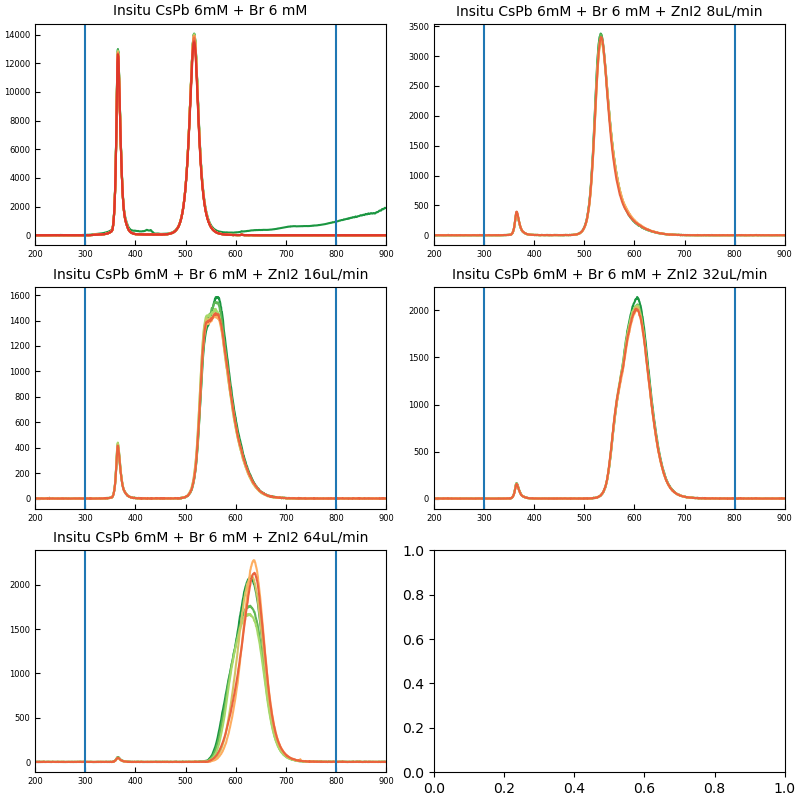

In [10]:
rows = 3
cols = 2
f1, ax1 = plt.subplots(rows, cols, figsize = (8, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
# df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
wl1 = 300
wl2 = 800

id0 = 0
id1 = 12
# skiprows = 11 ## skip 23 rows if data processed by dioptas or ## 8
for i in range(len(subfolder_PL)):
    # data_files = subfolder_PL
    data_files = glob.glob(subfolder_PL[i] + '/**.csv')
    data_files.sort()
    del data_files[-1]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=10)
    
    suffix = os.path.basename(data_files[0])
    if i==0:
        skiprows=4
        xlabel = 'Energy'
    else:
        skiprows=11
        xlabel = 'Wavelength'
    
    df_temp = pd.DataFrame()
    df_int = pd.DataFrame()
   
    ### plot every scan in subplots
    for j in range(len(data_files)):        
        df_temp = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        # df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
        df_int = pd.concat([df_int, df_temp['Fluorescence']], axis=1, ignore_index=False)
        ax1[i].plot(df_temp[f'{xlabel}'], df_temp['Fluorescence'], color=cmap(color_idx[j-k1]))      
    df_temp['Fluorescence_mean'] = df_int.mean(axis=1)
    # ax1[i].plot(df_temp[f'{xlabel}'], df_temp['Fluorescence_mean'], 'b--')
    
    ### Put average data into df
    df[f'x_{suffix[id0:id1]}'] = df_temp[f'{xlabel}']
    df[f'PL_{suffix[id0:id1]}'] = df_temp['Fluorescence_mean']
    
    
    ### Plot vertical lines to show nromalized range
    idx1, w1 = find_nearest(df[f'x_{suffix[id0:id1]}'], wl1)
    idx2, w2 = find_nearest(df[f'x_{suffix[id0:id1]}'], wl2)
    ax1[i].axvline(w1)
    ax1[i].axvline(w2)
    
    ### Put normalized average data into df_norm2
    x = df[f'PL_{suffix[id0:id1]}'].loc[idx1:idx2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'x_{suffix[id0:id1]}'] = df[f'x_{suffix[id0:id1]}'].loc[idx1:idx2].values
    df_norm2[f'PL_{suffix[id0:id1]}']= x_scaled.flatten()
    
    ax1[i].set_xlim(200, 900)
    # ax1[i].set_ylim(-0.1, max(PL[100:800])+0.2)
    ax1[i].tick_params(axis='both', direction='in', labelsize=6)

In [11]:
df

x_CsPbBr_100uL  PL_CsPbBr_100uL  x_CsPbI3_08ul_  PL_CsPbI3_08ul_  \
0         196.262863         2.302778      197.742294         0.592593   
1         197.066232         1.408333      198.544478         0.592593   
2         197.869529         2.206481      199.346597         0.388889   
3         198.672754         4.447222      200.148650         1.629630   
4         199.475907         5.854630      200.950637         0.666667   
...              ...              ...             ...              ...   
1039      989.418604       191.897222      990.769837         1.685185   
1040      990.139347         1.780556      991.489165         0.629630   
1041      990.860002         1.489815      992.208398         1.629630   
1042      991.580571         1.532407      992.927537         1.333333   
1043      992.301053         1.639815      993.646582         0.925926   

      x_CsPbI3_16ul_  PL_CsPbI3_16ul_  x_CsPbI3_32ul_  PL_CsPbI3_32ul_  \
0         197.742294         0.944444      197.742294         0.444444   
1         198.544478         0.870370      198.544478         0.722222   
2         199.346597         0.740741      199.346597         0.611111   
3         200.148650         1.351852      200.148650         1.574074   
4         200.950637         0.814815      200.950637         0.814815   
...              ...              ...             ...              ...   
1039      990.769837         1.407407      990.769837         2.185185   
1040      991.489165         0.814815      991.489165         0.500000   
1041      992.208398         2.092593      992.208398         1.944444   
1042      992.927537         1.129630      992.927537         1.037037   
1043      993.646582         1.666667      993.646582         1.259259   

      x_CsPbI3_64ul_  PL_CsPbI3_64ul_  
0         197.742294         0.592593  
1         198.544478         1.037037  
2         199.346597         0.444444  
3         200.148650         1.611111  
4         200.950637         1.685185  
...              ...              ...  
1039      990.769837         1.462963  
1040      991.489165         1.185185  
1041      992.208398         1.296296  
1042      992.927537         1.055556  
1043      993.646582         1.240741  

[1044 rows x 10 columns]

### Define keys for df

In [12]:
keys_list = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list

['x_CsPbBr_100uL',
 'PL_CsPbBr_100uL',
 'x_CsPbI3_08ul_',
 'PL_CsPbI3_08ul_',
 'x_CsPbI3_16ul_',
 'PL_CsPbI3_16ul_',
 'x_CsPbI3_32ul_',
 'PL_CsPbI3_32ul_',
 'x_CsPbI3_64ul_',
 'PL_CsPbI3_64ul_']

## Plot average PL profiles in df

In [13]:
f2, ax2 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder_PL)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder_PL)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df[keys_list[i*2]], df[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

## Plot normalized PL profiles in df_norm2

In [14]:
f3, ax3 = plt.subplots(1, 1, figsize = (6, 4), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder_PL)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder_PL)):
    #ax3.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax3.plot(df_norm2[keys_list[i*2]], df_norm2[keys_list[i*2+1]], color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax3.legend(fontsize=legendsize, prop=legend_properties)

## Gaussian peak fittimg

PL_CsPbBr_100uL passes c1 so is good.

** Average of PL_CsPbBr_100uL has peaks at [150]**


** start to do peak fitting by Gaussian**

PL_CsPbI3_08ul_ passes c1 so is good.

** Average of PL_CsPbI3_08ul_ has peaks at [169]**


** start to do peak fitting by Gaussian**

PL_CsPbI3_16ul_ passes c1 so is good.

** Average of PL_CsPbI3_16ul_ has peaks at [204]**


** start to do peak fitting by Gaussian**

PL_CsPbI3_32ul_ passes c1 so is good.

** Average of PL_CsPbI3_32ul_ has peaks at [263]**


** start to do peak fitting by Gaussian**

PL_CsPbI3_64ul_ passes c1 so is good.

** Average of PL_CsPbI3_64ul_ has peaks at [300]**


** start to do peak fitting by Gaussian**



Text(0, 0.5, 'PLQY')

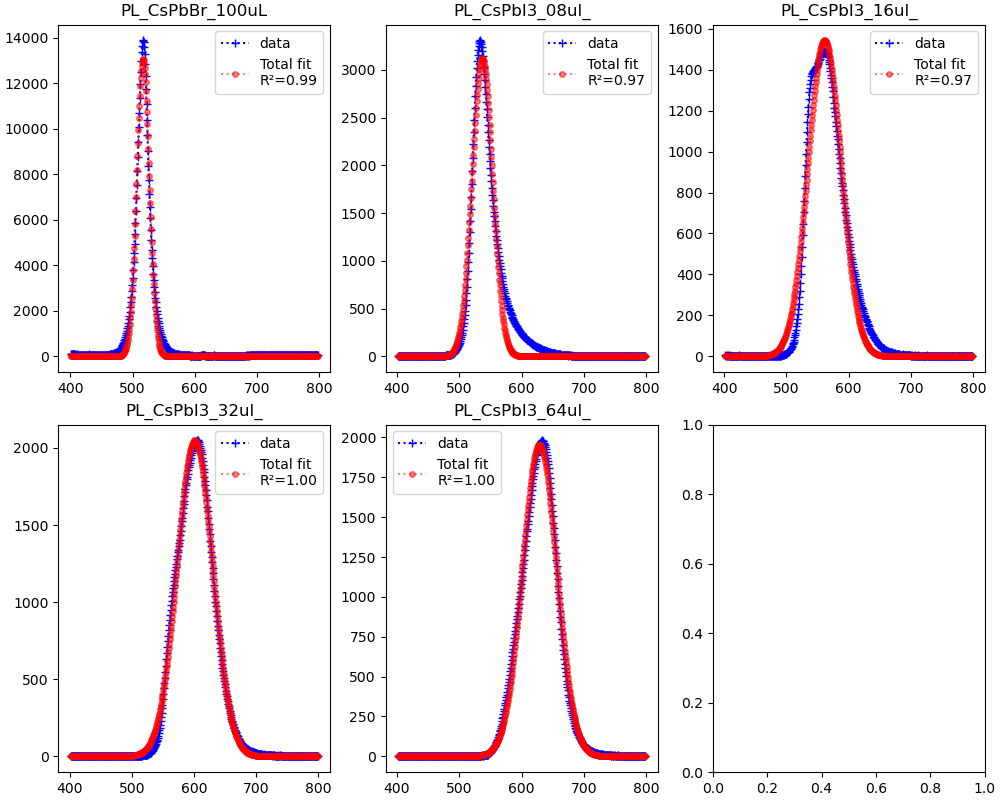

In [15]:
f4, ax4 = plt.subplots(2, 3, figsize = (10, 8), constrained_layout=True)
ax4 = ax4.flatten()
wl1 = 400
wl2 = 800
idx1, w1 = find_nearest(df[keys_list[0]], wl1)
idx2, w2 = find_nearest(df[keys_list[0]], wl2)

peak_list = []
fwhm = []
simpson_int = []

for i in range(len(subfolder_PL)):
    #i = 4
    x0 = df[keys_list[i*2]][idx1:idx2].to_numpy()
    y0 = df[keys_list[i*2+1]][idx1:idx2].to_numpy()
    #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))
    
    peak, prop = good_bad_data(x0, y0, key_height=500, data_id = f'{keys_list[i*2+1]}', distance=50, height=200)
    x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{keys_list[i*2+1]}', peak, prop)  
    
    
    simpson_int.append(integrate.simpson(y,x))
    peak_list.append(popt[1])
    fwhm.append(2.355*popt[2])
    
    
    fitted_result = f(x, *popt)
    r_2 = r_square(x, y, fitted_result)
    r2 = f'R\u00b2={r_2:.2f}'
    ax4[i].set_title(f'{keys_list[i*2+1]}')
    ax4[i].plot(x,y,'b+:',label='data')
    ax4[i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=4)
    
#     # peak 1
#     peak_1 = _1gauss(x, *popt[0:3])
#     ax4[i].plot(x, peak_1, "g", label='peak 1')
#     ax4[i].fill_between(x, peak_1.min(), peak_1, facecolor="green", alpha=0.5)

#     # peak 2
#     peak_2 = _1gauss(x, *popt[3:6])
#     ax4[i].plot(x, peak_2, "y", label='peak 2')
#     ax4[i].fill_between(x, peak_2.min(), peak_2, facecolor="yellow", alpha=0.5)
    
    ax4[i].legend()


# abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505, 1.302717])
abs_365 = np.asarray([0.45788178937234225, 0.906788585562671, 1.3468533683956367, 1.8042517715092394, 2.0145695678124844])
abs_365_r = 0.376390
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 468573.0
integral_pqds = np.asarray(simpson_int)

plqy = plqy_r*abs_365_r*(ref_idx_toluene**2)*integral_pqds / (integral_r*(ref_idx_H2SO4**2)*abs_365)
    
f5, ax5 = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)
ax5[0].set_title('Emission Peak')
ax5[0].plot([0,8,16,32,64], peak_list, '.--', markersize=10)
ax5[0].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')

ax5[1].set_title('FWHM')
ax5[1].plot([0,8,16,32,64], fwhm, 'g+--', markersize=12)
ax5[1].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')

ax5[2].set_title('PLQY')
ax5[2].plot([0,8,16,32,64], plqy, 'ro--', markersize=8)
ax5[2].set_xlabel(r'$ZnI_2\ rate\ (\mu L/min)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')

In [16]:
integral_pqds

array([371422.05530788, 142838.7517265 , 105100.24685462, 145949.88025167,
       135540.09579891])

## Plot all absorbance data and put avergae into pd.Dataframe()

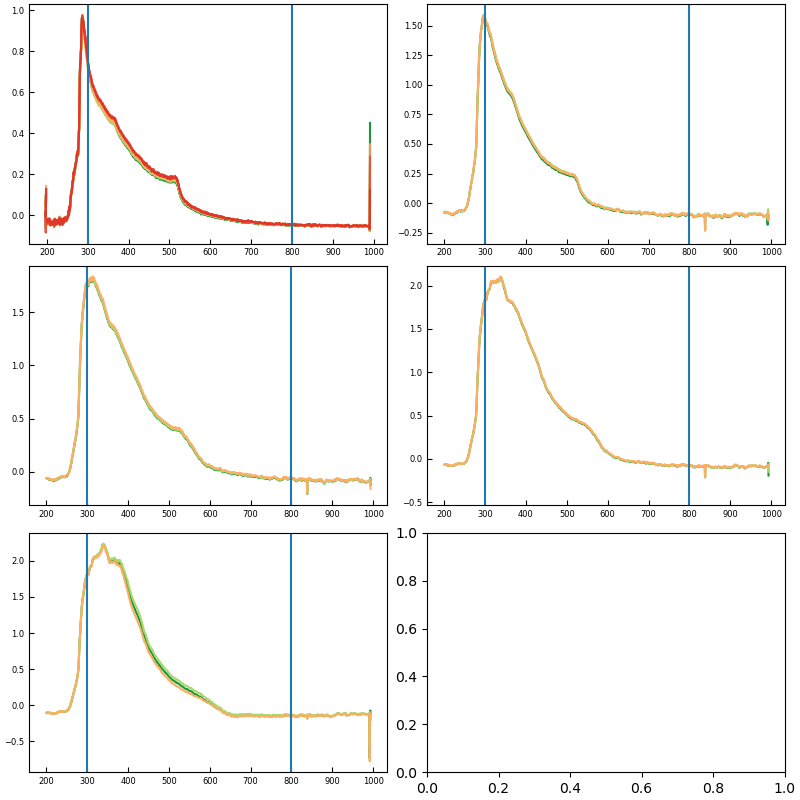

In [17]:
rows = 3
cols = 2
f11, ax11 = plt.subplots(rows, cols, figsize = (8, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax11 = ax11.flatten()
df = pd.DataFrame()
# df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
wl1 = 300
wl2 = 800

id0 = 0
id1 = 12
# skiprows = 11 ## skip 23 rows if data processed by dioptas or ## 8
for i in range(len(subfolder_Ab)):
    # data_files = subfolder_PL
    data_files = glob.glob(subfolder_Ab[i] + '/**.csv')
    data_files.sort()
    del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=10)
    
    suffix = os.path.basename(data_files[0])
    if i==0:
        skiprows=4
        xlabel = 'Energy'
    else:
        skiprows=11
        xlabel = 'Wavelength'
    
    df_temp = pd.DataFrame()
    df_int = pd.DataFrame()
   
    ### plot every scan in subplots
    for j in range(len(data_files)):        
        df_temp = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        # df_temp = pd.concat([df_temp, df[f'{suffix[id0:id1]}'], axis=1, ignore_index=False)
        df_int = pd.concat([df_int, df_temp['Absorbance']], axis=1, ignore_index=False)
        ax11[i].plot(df_temp[f'{xlabel}'], df_temp['Absorbance'], color=cmap(color_idx[j-k1]))      
    df_temp['Absorbance_mean'] = df_int.mean(axis=1)
    # ax1[i].plot(df_temp[f'{xlabel}'], df_temp['Fluorescence_mean'], 'b--')
    
    ### Put average data into df
    df[f'x_{suffix[id0:id1]}'] = df_temp[f'{xlabel}']
    df[f'Ab_{suffix[id0:id1]}'] = df_temp['Absorbance_mean']
    
    
    ### Plot vertical lines to show nromalized range
    idx1, w1 = find_nearest(df[f'x_{suffix[id0:id1]}'], wl1)
    idx2, w2 = find_nearest(df[f'x_{suffix[id0:id1]}'], wl2)
    ax11[i].axvline(w1)
    ax11[i].axvline(w2)
    
    ### Put normalized average data into df_norm2
    x = df[f'Ab_{suffix[id0:id1]}'].loc[idx1:idx2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'x_{suffix[id0:id1]}'] = df[f'x_{suffix[id0:id1]}'].loc[idx1:idx2].values
    df_norm2[f'Ab_{suffix[id0:id1]}']= x_scaled.flatten()
    
    # ax11[i].set_xlim(200, 900)
    # ax1[i].set_ylim(-0.1, max(PL[100:800])+0.2)
    ax11[i].tick_params(axis='both', direction='in', labelsize=6)

In [18]:
df

x_CsPbBr_100uL  Ab_CsPbBr_100uL  x_CsPbI3_08ul_  Ab_CsPbI3_08ul_  \
0         196.262863         0.030336      197.742294        -0.029860   
1         197.066232        -0.013641      198.544478              NaN   
2         197.869529         0.108271      199.346597              NaN   
3         198.672754              NaN      200.148650              NaN   
4         199.475907        -0.020729      200.950637        -0.076789   
...              ...              ...             ...              ...   
1039      989.418604        -0.049699      990.769837        -0.095240   
1040      990.139347        -0.064903      991.489165        -0.145672   
1041      990.860002         0.206576      992.208398        -0.079537   
1042      991.580571              NaN      992.927537        -0.093985   
1043      992.301053              inf      993.646582        -0.129654   

      x_CsPbI3_16ul_  Ab_CsPbI3_16ul_  x_CsPbI3_32ul_  Ab_CsPbI3_32ul_  \
0         197.742294         0.112129      197.742294        -0.283593   
1         198.544478              NaN      198.544478              NaN   
2         199.346597              NaN      199.346597              NaN   
3         200.148650              NaN      200.148650              NaN   
4         200.950637        -0.058466      200.950637        -0.064325   
...              ...              ...             ...              ...   
1039      990.769837        -0.081358      990.769837        -0.080414   
1040      991.489165        -0.081543      991.489165        -0.082922   
1041      992.208398        -0.082221      992.208398        -0.067915   
1042      992.927537        -0.088181      992.927537        -0.094725   
1043      993.646582        -0.126752      993.646582        -0.110737   

      x_CsPbI3_64ul_  Ab_CsPbI3_64ul_  
0         197.742294        -0.190775  
1         198.544478              NaN  
2         199.346597              NaN  
3         200.148650              NaN  
4         200.950637        -0.103342  
...              ...              ...  
1039      990.769837        -0.113065  
1040      991.489165        -0.695121  
1041      992.208398        -0.095453  
1042      992.927537        -0.111349  
1043      993.646582        -0.171288  

[1044 rows x 10 columns]

In [19]:
keys_list2 = list(df.keys())
# k1 = [k for k in keys_list if 'mean' in k]
keys_list2

['x_CsPbBr_100uL',
 'Ab_CsPbBr_100uL',
 'x_CsPbI3_08ul_',
 'Ab_CsPbI3_08ul_',
 'x_CsPbI3_16ul_',
 'Ab_CsPbI3_16ul_',
 'x_CsPbI3_32ul_',
 'Ab_CsPbI3_32ul_',
 'x_CsPbI3_64ul_',
 'Ab_CsPbI3_64ul_']

In [20]:
idx_365, w365 = find_nearest(df[keys_list2[0]], 365)
df.iloc[idx_365][::-2][::-1].to_list()
idx_365

212

In [21]:
df.iloc[210:220]

x_CsPbBr_100uL  Ab_CsPbBr_100uL  x_CsPbI3_08ul_  Ab_CsPbI3_08ul_  \
210      363.366503         0.458737      364.721267         0.916058   
211      364.154418         0.458878      365.509089         0.910565   
212      364.942258         0.457882      366.296840         0.906789   
213      365.730023         0.455410      367.084519         0.900757   
214      366.517713         0.455956      367.872128         0.893218   
215      367.305328         0.452628      368.659665         0.888262   
216      368.092867         0.446008      369.447130         0.880615   
217      368.880332         0.443002      370.234524         0.873683   
218      369.667721         0.440139      371.021847         0.867755   
219      370.455035         0.434425      371.809098         0.858112   

     x_CsPbI3_16ul_  Ab_CsPbI3_16ul_  x_CsPbI3_32ul_  Ab_CsPbI3_32ul_  \
210      364.721267         1.350698      364.721267         1.805538   
211      365.509089         1.349976      365.509089         1.809726   
212      366.296840         1.346853      366.296840         1.804252   
213      367.084519         1.341109      367.084519         1.805381   
214      367.872128         1.336084      367.872128         1.798484   
215      368.659665         1.330968      368.659665         1.789775   
216      369.447130         1.326333      369.447130         1.783445   
217      370.234524         1.317789      370.234524         1.771216   
218      371.021847         1.313901      371.021847         1.770308   
219      371.809098         1.306532      371.809098         1.763306   

     x_CsPbI3_64ul_  Ab_CsPbI3_64ul_  
210      364.721267         2.010361  
211      365.509089         2.019329  
212      366.296840         2.014570  
213      367.084519         2.019783  
214      367.872128         2.009202  
215      368.659665         2.002564  
216      369.447130         2.000599  
217      370.234524         1.986340  
218      371.021847         1.987827  
219      371.809098         1.982587